# Week of 2025.06.02

## TODO
- [x] Model 1D conduit. Make the atmosphere also 1D. 
- [ ] Figure out what level of resolution is required to get an accurate atmosphere simulation. 
- [x] Compare analytical and numerical results.

### Re-run full simulation with the following changes 
- [x] Keep in mind that radius, not diameter, is m. 

### Atmosphere 
- [x] How does atmosphere coupling work? Does it matter how far down into the conduit the atmosphere is simulated? The depth dictates where the transition boundary is. It only metters in order to generate a "vertical column" of pressure rather than radiating outwards.

## Vertical conduit mesh

Our first goal this week is to create a vertical mesh to simplify the simulation and verify that the wave properties behave as intended. Let's make the mesh go 50 meters deep into the conduit and then 250m into the air.

In [51]:
%load_ext autoreload
%autoreload 2

In [274]:
from helper_code.slip_imports import *
from helper_code.helper_functions import get_local_solver_from_index_func, get_quantities_at_conduit_exit
from helper_code.animate import animate_conduit_pressure

import helper_code.infrasound as infrasound
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt 
plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

folder_name = "simple_conduit"

/Users/paxton/git/quail_volcano/src

Points: (260, 3)
Cells: dict_keys(['line', 'triangle'])
Cell Sets: {}


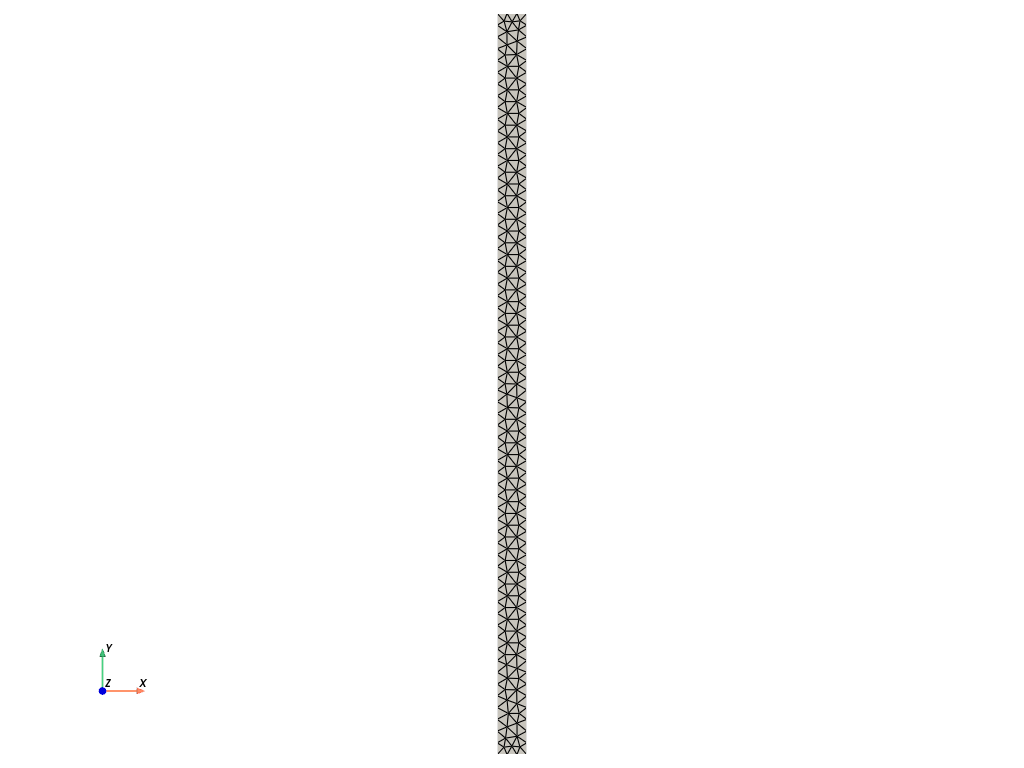

In [304]:
import meshio
import pyvista as pv
import os

print(os.getcwd())

mesh = meshio.read(f"{BASE_PATH}/quail_volcano/scenarios/meshes/vertical_conduit.msh")

# Clear cell sets to avoid the error
mesh.cell_sets.clear()

# Print mesh details
print("Points:", mesh.points.shape)
print("Cells:", mesh.cells_dict.keys())
#for cell_type, cell_data in mesh.cells_dict.items():
    #print(f"Cell type {cell_type}: {cell_data.shape}")
print("Cell Sets:", mesh.cell_sets)
#print("Cell Data:", mesh.cell_data)

pv.set_jupyter_backend('static')

# Convert to pyvista mesh
pv_mesh = pv.from_meshio(mesh)

# Create a plotter and visualize
plotter = pv.Plotter()

plotter.add_mesh(pv_mesh, show_edges=True, color="white")
plotter.set_scale(xscale=1.0, yscale=1.0, zscale=1.0)
plotter.camera.roll += 80

plotter.view_xy()  # For 2D meshes; use view_isometric() for 3D
plotter.show_axes()
plotter.show()

## Let's then review the "eruption" we are experimenting with. 

In [34]:
from helper_code.slip_imports import *
from helper_code.helper_functions import get_local_solver_from_index_func
from helper_code.animate import animate_conduit_pressure

import helper_code.infrasound as infrasound
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt 
plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

folder_name = "simple_conduit"

ITERS = 50
D_ITERS = 1
END_TIME = 20
C0 = 320 # m/s at 5000m

In [ ]:
file_name = "short_plug_v12"
iters = 50
solver_func = get_local_solver_from_index_func(folder_name, file_name)
ani = animate_conduit_pressure(
    solver_func,
    iterations=iters,
    d_iterations=D_ITERS,
    viscosity_index=2,
    wall_friction_index=1,
    max_velocity=5,
    max_slip=60,
    max_tau=1.5,
    max_pressure=50,
    max_speed_of_sound=1000,
    max_water=1,
    max_density=5e3,
    max_fragmentation=5000,
    max_crystal=100,
    max_viscosity=0.1,
)

ani.save(
    f"{BASE_PATH}/volcano_sims/notebooks/animations/small_controlled_eruption.mp4",
    writer="ffmpeg",
    fps=10,
    bitrate=1800,
)
HTML(ani.to_html5_video())

## And the the specific eruption and atmosphere of our simple model looks like this

In [258]:
file_name = "short_plug_v17"
iters = 100
solver_func = get_local_solver_from_index_func(folder_name, file_name)
ani = animate_conduit_pressure(
    solver_func,
    iterations=iters,
    d_iterations=5,
    viscosity_index=2,
    wall_friction_index=1,
    max_velocity=5,
    max_slip=60,
    max_tau=1.5,
    max_pressure=20,
    max_speed_of_sound=1000,
    max_water=1,
    max_density=5e3,
    max_fragmentation=5000,
    max_crystal=100,
    max_viscosity=0.1,
    y_min=-1000,
)

ani.save(
    f"{BASE_PATH}/volcano_sims/notebooks/animations/small_controlled_eruption.mp4",
    writer="ffmpeg",
    fps=10,
    bitrate=1800,
)
HTML(ani.to_html5_video())

## Let's review the pressure and velocity at the outlet (y=0)

In [307]:
file_name = "short_plug_v17"
solver_func = get_local_solver_from_index_func(folder_name, file_name)
t_atm, p_atm, u_atm, temp_atm = get_quantities_at_conduit_exit(solver_func, iterations=100)

file_name = "short_plug_v12"
solver_func = get_local_solver_from_index_func(folder_name, file_name)
t_original, p_original, u_original, _ = get_quantities_at_conduit_exit(solver_func, iterations=50)

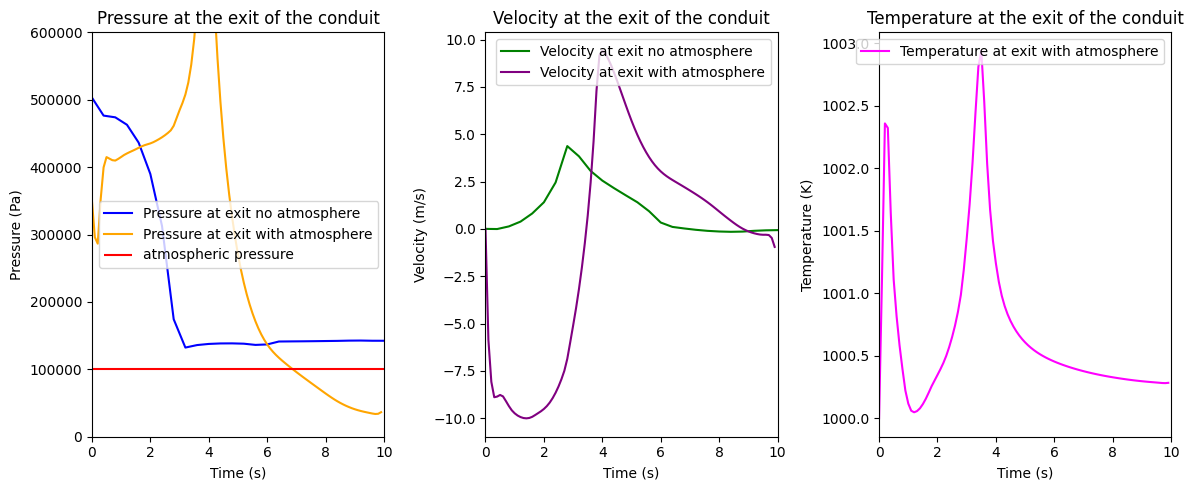

In [308]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming t_vec and p_vec are defined; if not, here's a placeholder for demonstration
# t_vec = np.linspace(0, 10, 100)
# p_vec = np.sin(t_vec) * 0.5e6  # Example data

# Create figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# First plot
ax1.plot(t_original, p_original, label="Pressure at exit no atmosphere", color="blue")
ax1.plot(t_atm, p_atm, label="Pressure at exit with atmosphere", color="orange")
ax1.hlines(y=1e5, xmin=0, xmax=20, color="red", label="atmospheric pressure")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Pressure (Pa)")
ax1.set_title("Pressure at the exit of the conduit")
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6e5)
ax1.legend()

# Second plot (identical)
ax2.plot(t_original, u_original, label="Velocity at exit no atmosphere", color="green")
ax2.plot(t_atm, u_atm, label="Velocity at exit with atmosphere", color="purple")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax2.set_title("Velocity at the exit of the conduit")
ax2.set_xlim(0, 10)
ax2.legend()

# Third plot (identical)
ax3.plot(t_atm, temp_atm, label="Temperature at exit with atmosphere", color="magenta")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Temperature (K)")
ax3.set_title("Temperature at the exit of the conduit")
ax3.set_xlim(0, 10)
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Let's review the vertical simulation again with some changes
1. Reduce the conduit below the surface to 30 meters (this is where the 1d -> 2d boundary is). 30m is three times the radius which is roughly the same ratio Fred used when he was writing about the atmosphere coupling. 
2. Increase the vertical height of the conduit to 500m. That will allow the simulation to run a little bit longer. 
3. Increase the size of each element to have 3m sides. That means that about three triangles can fit between the conduit walls. I should probably reduce this to 2 at some point. 


Let's also try to plot some more information like temperature. 

**Notes**
1. I realized I had been ignoring negative velocity with my monopole model. That should help the system look more similar. 

In [306]:
import matplotlib
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import processing.mdtools as mdtools

file_name = "short_plug_v18"

iters = 50

solver_func = get_local_solver_from_index_func(folder_name, file_name)
solver2D_atm1 = get_local_solver_from_index_func("simple_conduit", "test_infrasound_vertical_conduit_v3_atm1")

u_vec = []
t_vec = []
R = 10 # m

for i in range(0, iters, 1):
    solver = solver_func(i)
    momentum = solver.state_coeffs[:,:,solver.physics.get_momentum_slice()]
    rho = np.sum(solver.state_coeffs[:, :, solver.physics.get_mass_slice()],axis=2,keepdims=True)

    # Define velocity as momentum divided by density
    u = momentum.ravel() / rho.ravel()

    # Take only the exit velocity
    u_vec.append(u[-1])
    t_vec.append(solver.time)

a_vec = np.gradient(np.array(u_vec), np.array(t_vec))
Q_dot_vec = np.pi * R**2 * a_vec # m^3/s^2

N = 100
pressure_array = np.zeros((len(t_vec), N, N))
x_low, x_upper = -100, 100
y_low, y_upper = -50, 1000

X = np.linspace(x_low, x_upper, N)
Y = np.linspace(y_low, y_upper, N)

# Set up the figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
im1 = ax1.imshow(pressure_array[0], extent=[x_low, x_upper, y_low, y_upper], 
                aspect='auto', cmap=matplotlib.cm.PiYG, origin='lower', vmin=-1e4, vmax=1e4)
clims = [-1e4 + 1e5, 1e4 + 1e5]
t_clims = [0, 1e3]

# Initialize second plot with empty data
x1, p1 = mdtools.downsample(solver2D_atm1(0), plot_qty="Pressure")
x1, p1_0= mdtools.downsample(solver2D_atm1(0), plot_qty="Pressure")
im2 = mdtools.plot_mean(x1, p1 - p1_0, clims, ax=ax2, cmap=matplotlib.cm.PiYG)

x1, t1 = mdtools.downsample(solver2D_atm1(0), plot_qty="Temperature")
im3 = mdtools.plot_mean(x1, t1, t_clims, ax=ax3, cmap=matplotlib.cm.PiYG)

# Set up colorbar
sm = plt.cm.ScalarMappable(
    norm=colors.Normalize(vmin=clims[0], vmax=clims[1]),
    cmap=matplotlib.cm.PiYG
)
cb = plt.colorbar(sm, ax=ax2)
cb.set_label("Pressure (Pa)")

sm3 = plt.cm.ScalarMappable(
    norm=colors.Normalize(vmin=t_clims[0], vmax=t_clims[1]),
    cmap=matplotlib.cm.PiYG
)
cb = plt.colorbar(sm3, ax=ax3)
cb.set_label("Temperature (K)")

plt.colorbar(im1, ax=ax1, label='Pressure (Pa)')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('Pressure Distribution Over Time (Original)')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('Pressure Distribution Over Time (Downsampled)')
ax3.set_xlabel('X (m)')
ax3.set_ylabel('Y (m)')
ax3.set_title('Temperature Distribution Over Time (Downsampled)')
plt.tight_layout()

# Initialization function for animation
def init():
    im1.set_array(np.zeros((N, N)))
    x1, p1 = mdtools.downsample(solver2D_atm1(0), plot_qty="Pressure")
    im2 = mdtools.plot_mean(x1, p1, clims, ax=ax2)
    x1, t1 = mdtools.downsample(solver2D_atm1(0), plot_qty="Temperature")
    im3 = mdtools.plot_mean(x1, t1, t_clims, ax=ax3)
    return [im1, im2, im3]

# Animation update function
def update(t_idx):
    t = t_vec[t_idx]
    # Update first plot (original)
    for i in range(N):
        for j in range(N):
            x = X[i]
            y = Y[j]
            if infrasound.point_inside_vertical_conduit(x, y):
                pressure_array[int(t_idx), j, i] = infrasound.relative_pressure_vertical_conduit(t, x, y, t_vec, Q_dot_vec)
            else:
                pressure_array[int(t_idx), j, i] = np.nan  # Set pressure to NaN inside volcano

    im1.set_array(pressure_array[int(t_idx)])
    ax1.set_title(f'Monopole Pressure Distribution at t={t:.2f} s')

    # Update second plot (downsampled)
    x1, p1 = mdtools.downsample(solver2D_atm1(t_idx), plot_qty="Pressure")
    im2 = mdtools.plot_mean(x1, p1, clims, ax=ax2)
    ax2.set_title(f'Quail Pressure Distribution at t={t:.2f} s')

    # Update third plot (temperature)
    x1, t1 = mdtools.downsample(solver2D_atm1(t_idx), plot_qty="Temperature")
    im3 = mdtools.plot_mean(x1, t1, t_clims, ax=ax3)
    ax3.set_title(f'Quail Temperature Distribution at t={t:.2f} s')

    if t_idx % 10 == 0:
        print(f"Frame {t_idx} at time {t:.2f} s")

    return [im1, im2, im3]

# Create animation
print("Creating animation...")
ani = FuncAnimation(fig, update, init_func=init, frames=range(0, iters, 8), 
                    interval=200, blit=True)

#ani.save(f'{BASE_PATH}/volcano_sims/notebooks/animations/monopole_source_dual_downsampled.mp4', writer='ffmpeg', fps=10, bitrate=1800)

display(HTML(ani.to_html5_video()))
plt.close(fig)  # Clean up

Creating animation...
Frame 0 at time 0.00 s
Frame 40 at time 8.00 s


In [263]:
import matplotlib.tri as tri
from helper_code.infrasound import *
solver_2D = solver2D_atm1(0)

triangulation = tri.Triangulation(solver_2D.mesh.node_coords[...,0],
                  solver_2D.mesh.node_coords[...,1], 
                  triangles=solver_2D.mesh.elem_to_node_IDs)
trifinder = triangulation.get_trifinder()

p_0_quail = infrasound.get_p_series(5, 0, solver2D_atm1, trifinder, iterations=80, p0=1e5)
p_100_quail = infrasound.get_p_series(5, 100, solver2D_atm1, trifinder, iterations=80, p0=1e5)
p_200_quail = infrasound.get_p_series(5, 200, solver2D_atm1, trifinder, iterations=80, p0=1e5)

Element ID for point (5, 0): 2037
Element ID for point (5, 100): 1917
Element ID for point (5, 200): 1794


In [264]:
p_0_monopole = pressure_array[:, np.argmin(np.abs(Y - 5)), np.argmin(np.abs(X-5))]
p_100_monopole = pressure_array[:, np.argmin(np.abs(Y - 100)), np.argmin(np.abs(X-5))]
p_200_monopole = pressure_array[:, np.argmin(np.abs(Y - 200)), np.argmin(np.abs(X-5))]

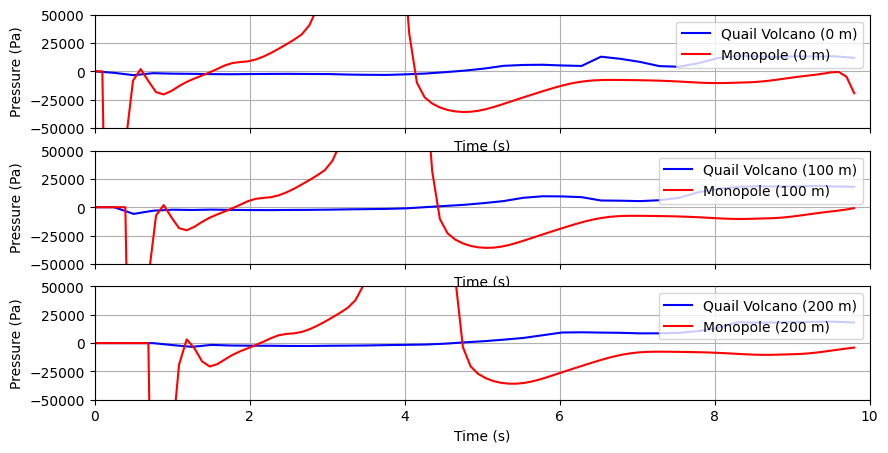

In [266]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5), sharex=True)


t_quail = np.linspace(0, 9.8, len(p_0_quail))
t_monopole = np.linspace(0, 9.8, len(p_0_monopole))

axes[0].plot(t_quail, p_0_quail, label='Quail Volcano (0 m)', color='blue')
axes[0].plot(t_monopole, p_0_monopole, label='Monopole (0 m)', color='red')
axes[1].plot(t_quail, p_100_quail, label='Quail Volcano (100 m)', color='blue')
axes[1].plot(t_monopole, p_100_monopole, label='Monopole (100 m)', color='red')
axes[2].plot(t_quail, p_200_quail, label='Quail Volcano (200 m)', color='blue')
axes[2].plot(t_monopole, p_200_monopole, label='Monopole (200 m)', color='red')

for i, ax in enumerate(axes):
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.set_ylim(-5e4, 5e4)  
    ax.set_xlim(0, 10)
    ax.set_ylabel('Pressure (Pa)')
    ax.set_xlabel('Time (s)')

### Could it be my challenges are related to the melt/atmosphere overlapping? 

Short answer. No. Even when I modify the y values to go from 0 -> 250 we see the same behavior.

### Could it be the large difference in temp? 

Melt is at around 1000k while the atmosphere is at around 300k. Let's reducing the temp of the volcano and see if that resolves my challenges a little bit. Well it turns out the temp of the volcano is hard to change. Even if I reduce the initial condition temperature, shortly after the initial time step the volcano temp pops back to 1000k... I tried increasing the temperature of the atmosphere to see if that affects the situation. I still don't really see how tempature would affect the initial negative velocity

### Try reducing the pressure in the atmosphere to 0.5e5. That in theory should help maintain a positive velocity. 



In [ ]:
file_name = "short_plug_v18"
solver_func = get_local_solver_from_index_func(folder_name, file_name, compute_temp=True)
t_atm, p_atm, u_atm, temp_atm = get_quantities_at_conduit_exit(solver_func, iterations=10)

file_name = "short_plug_v12"
solver_func = get_local_solver_from_index_func(folder_name, file_name)
t_original, p_original, u_original, _ = get_quantities_at_conduit_exit(solver_func, iterations=50)

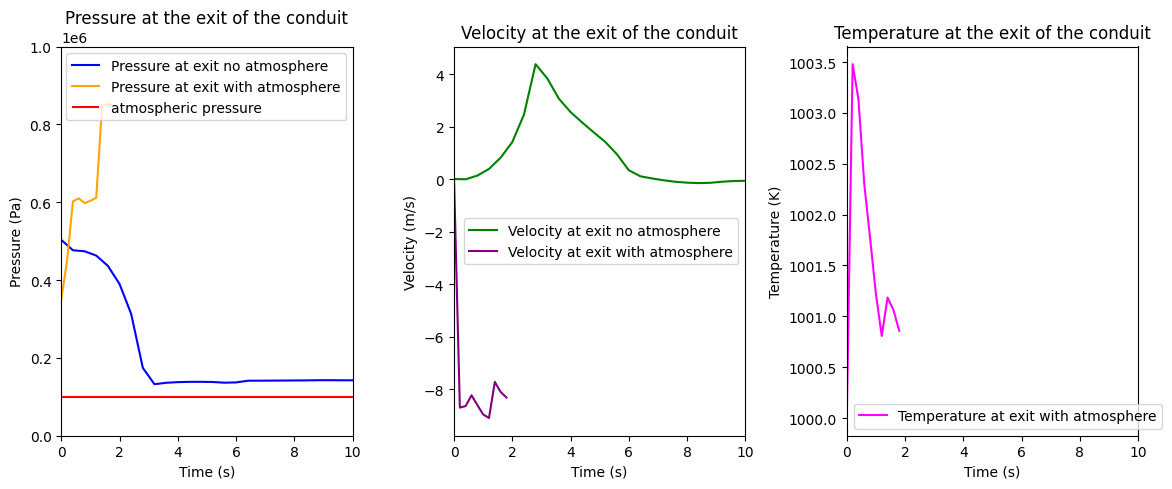

In [316]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming t_vec and p_vec are defined; if not, here's a placeholder for demonstration
# t_vec = np.linspace(0, 10, 100)
# p_vec = np.sin(t_vec) * 0.5e6  # Example data

# Create figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# First plot
ax1.plot(t_original, p_original, label="Pressure at exit no atmosphere", color="blue")
ax1.plot(t_atm, p_atm, label="Pressure at exit with atmosphere", color="orange")
ax1.hlines(y=1e5, xmin=0, xmax=20, color="red", label="atmospheric pressure")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Pressure (Pa)")
ax1.set_title("Pressure at the exit of the conduit")
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10e5)
ax1.legend()

# Second plot (identical)
ax2.plot(t_original, u_original, label="Velocity at exit no atmosphere", color="green")
ax2.plot(t_atm, u_atm, label="Velocity at exit with atmosphere", color="purple")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Velocity (m/s)")
ax2.set_title("Velocity at the exit of the conduit")
ax2.set_xlim(0, 10)
ax2.legend()

# Third plot (identical)
ax3.plot(t_atm, temp_atm, label="Temperature at exit with atmosphere", color="magenta")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Temperature (K)")
ax3.set_title("Temperature at the exit of the conduit")
ax3.set_xlim(0, 10)
ax3.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()